In [20]:
!pip install biopython
!pip install ipytree
!pip install scikit-allel
!pip install zarr
!pip install --upgrade pip
!pip install --upgrade setuptools wheel
!pip install --upgrade "mxnet<2.0.0"
!pip install autogluon

In [21]:
# #@title Mount Google Drive (You don't need to run this if you are running notebooks on your laptop)

# from google.colab import drive

# # The following command will prompt a URL for you to click and obtain the
# # authorization code

# drive.mount("/content/drive")

In [22]:
from pathlib import Path

# Change this to where you put your hw1 files
DATA = Path("/Users/lyz9518/Desktop/single_cell")

In [26]:
import gzip
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

data = DATA / "K27Mproject.RSEM.vh20170621.txt.gz"
meta = DATA / "PortalK27M_Metadata.vh20180223.txt"
data_set = pd.read_csv(data, comment='#', sep="\t")
metadata = pd.read_csv(meta, comment='#', sep="\t")

In [27]:
metadata

,NAME,Sample,GenesExpressed,HousekeepingGeneExpression,Type,Cellcycle,OPC-variable,OC-like,AC-like,OPC-like
0,TYPE,group,numeric,numeric,group,numeric,numeric,numeric,numeric,numeric
1,BCH1126-P01-A01,BCH1126,4064,6.371650316,Malignant,-0.44186567,-1.018729626,-0.511928109,-0.523686956,0.83940171
2,BCH1126-P01-A02,BCH1126,5162,6.363841855,Malignant,-0.490522093,-0.938585898,-0.018924871,-1.02391073,0.400311983
3,BCH1126-P01-A04,BCH1126,3583,4.623983418,Malignant,0.319448462,-0.870724574,0.327553519,0.303905206,-0.314469209
4,BCH1126-P01-A07,BCH1126,4743,6.131107408,Malignant,-0.747714419,-0.444016923,-0.461922304,-0.421771418,1.11865115
...,...,...,...,...,...,...,...,...,...,...
4054,Oligo-P22-H03,Oligo,NaN,NaN,Oligodendrocyte,NaN,NaN,NaN,NaN,NaN
4055,Oligo-P22-H05,Oligo,NaN,NaN,Oligodendrocyte,NaN,NaN,NaN,NaN,NaN
4056,Oligo-P22-H06,Oligo,NaN,NaN,Oligodendrocyte,NaN,NaN,NaN,NaN,NaN
4057,Oligo-P22-H08,Oligo,NaN,NaN,Oligodendrocyte,NaN,NaN,NaN,NaN,NaN


In [28]:
metadata.describe()

,NAME,Sample,GenesExpressed,HousekeepingGeneExpression,Type,Cellcycle,OPC-variable,OC-like,AC-like,OPC-like
count,4059,4059,2459,2459,4059,2260,2260,2260,2260,2260
unique,4059,17,1966,2459,8,2260,2260,2260,2260,2260
top,TYPE,MUV5,5178,numeric,Malignant,numeric,numeric,numeric,numeric,numeric
freq,1,708,5,1,2259,1,1,1,1,1


In [29]:
gene_list = data_set[['Gene']]
del data_set['Gene']
gene_list
data_set

,MUV1-P04-B12,MUV1-P04-C08,MUV1-P04-D09,MUV1-P04-D10,MUV1-P04-E03,MUV1-P04-E07,MUV1-P04-E08,MUV1-P04-E10,MUV1-P04-E11,MUV1-P04-F05,...,Oligo-P22-G05,Oligo-P22-G07,Oligo-P22-G11,Oligo-P22-G12,Oligo-P22-H02,Oligo-P22-H03,Oligo-P22-H05,Oligo-P22-H06,Oligo-P22-H08,Oligo-P22-H09
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,132.26,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.34,0.00,0.00,...,0.00,0.65,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
3,0.00,0.00,0.00,0.00,348.48,362.08,0.00,0.00,0.00,27.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,1.19,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1098.07,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23681,0.00,0.93,11.51,2.69,6.24,33.41,3.04,3.04,21.36,10.89,...,1.40,0.00,1.35,7.97,1.11,4.42,0.00,0.0,0.00,16.26
23682,40.65,1.77,124.90,1.43,120.83,22.66,143.31,2.43,23.37,72.72,...,1.66,3.71,5.40,3.10,1.80,1.40,0.00,8.4,2.79,0.00
23683,63.27,556.98,0.00,0.00,6.27,33.87,0.00,0.00,2.67,0.00,...,11.25,309.60,49.03,0.00,18.41,157.44,9.75,0.0,0.00,0.00
23684,0.00,0.00,283.93,173.14,38.58,5.43,0.00,0.00,43.78,0.00,...,12.11,0.00,0.00,67.26,8.64,6.56,1.94,0.0,0.00,0.00


/opt/anaconda3/envs/bioml/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


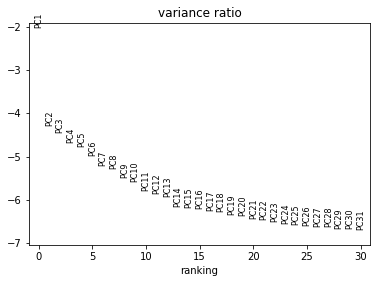

In [30]:
anndata_frame = sc.AnnData(data_set)
anndata_frame.obs['n_counts'] = np.ravel(anndata_frame.X.sum(axis=1))

sc.pp.normalize_per_cell(anndata_frame, counts_per_cell_after=1e4)
sc.pp.log1p(anndata_frame)
sc.pp.highly_variable_genes(anndata_frame, min_mean=0.0125, max_mean=4, min_disp=0.5)
sc.pp.regress_out(anndata_frame, keys=['n_counts'])
sc.pp.scale(anndata_frame, max_value=10)

sc.tl.pca(anndata_frame, svd_solver='arpack')
sc.pl.pca_variance_ratio(anndata_frame, log=True)

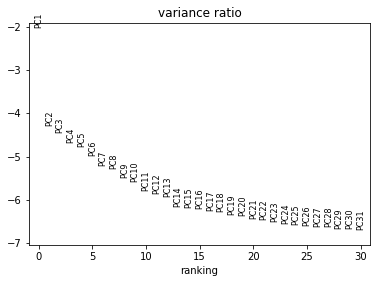

In [31]:
sc.tl.pca(anndata_frame, svd_solver='arpack')
sc.pl.pca_variance_ratio(anndata_frame, log=True)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


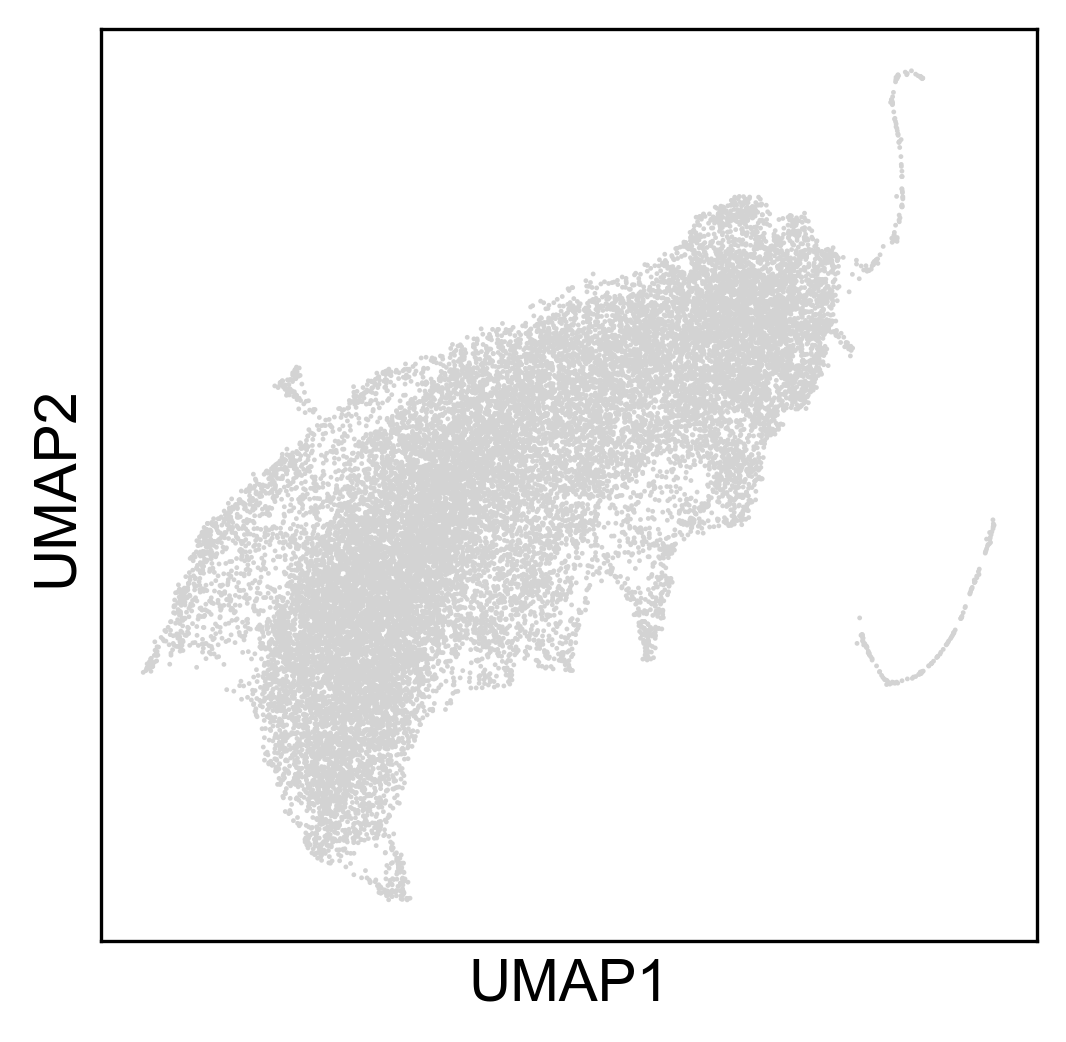

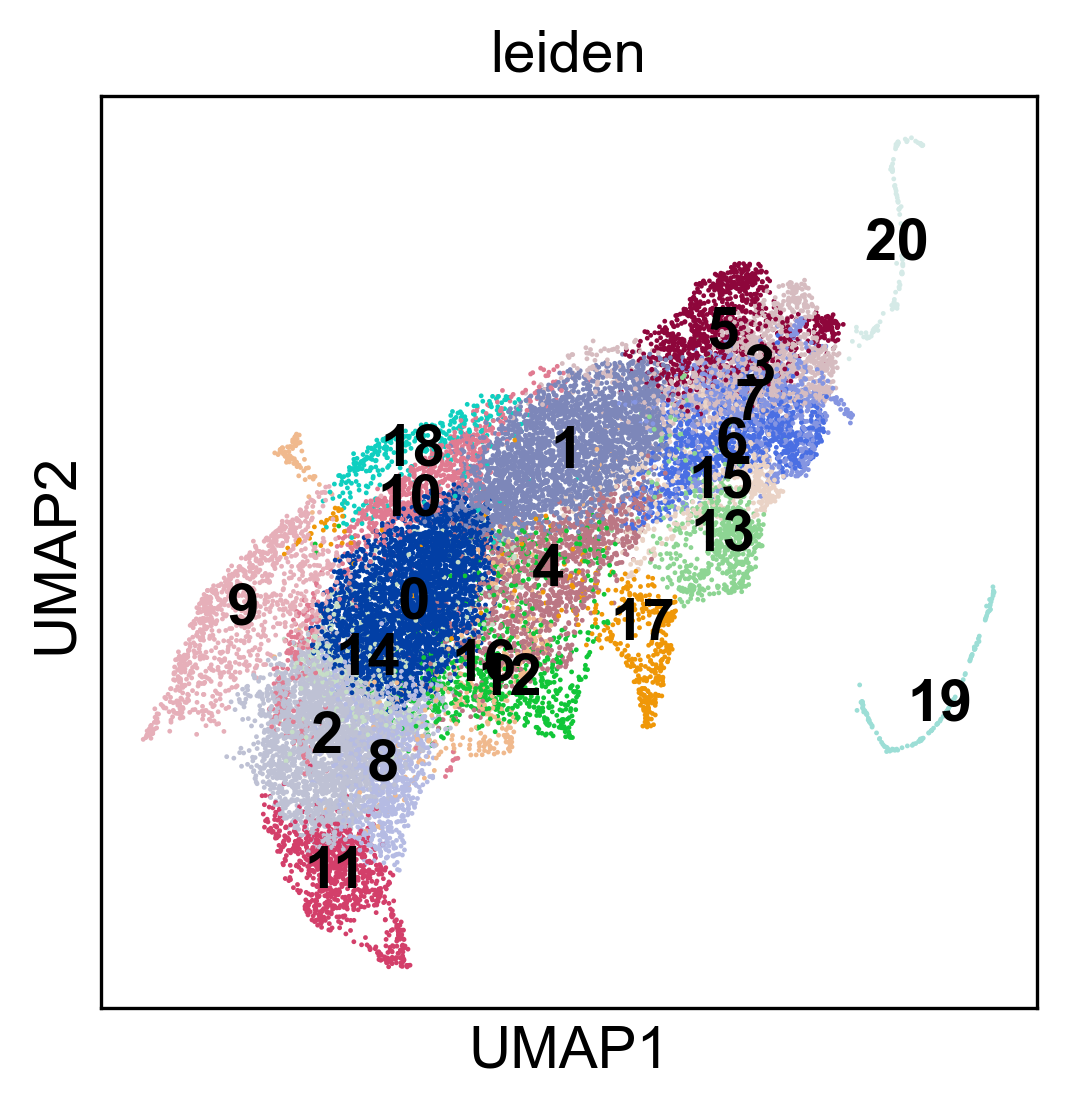

In [32]:
sc.pp.neighbors(anndata_frame, n_neighbors=15, n_pcs=15)
sc.tl.leiden(anndata_frame)
sc.tl.umap(anndata_frame)
sc.settings.set_figure_params(dpi=150)
sc.pl.umap(anndata_frame)
sc.pl.umap(anndata_frame, color=['leiden'], legend_loc="on data")